# Waveform with GW150914 parameters

From a compact binary coalescence we can observe gravitational waves (GW) emission. The fundamental parameter in the Newtonian approximation for GWs emission is the *chirp mass*

$$
\mathcal{M} = \frac{ (m_1 m_2)^{3/5} }{ (m_1 + m_ 2)^{1/5} }
$$

where $m_1$ and $m_2$ are the masses of the two bodies.

In [2]:
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
# constants 
G   = const.G.value     # N m^2/kg^2
M_S = const.M_sun.value # kg
C   = const.c.value     # m/s

## Frequency - time plot

During the inspiral the emitted frequency evolves in time as

$$
f(t) = \left[ f_0 ^{-8/3} - \frac{256}{5} \pi^{8/3} \mathcal{M}^{5/3} \frac{G^{5/3}}{c^5} (t - t_0)\right]^{-3/8} 
$$

where 

$$
f_0 = \frac{1}{2 \pi \sqrt{2}} \left(\frac{G M_{\odot}}{c^3}\right)^{-1} \frac{1}{M/M_{\odot}}
$$ 

is the maximum frequency in the merger, with $ M = m_1 + m_2 $ (total mass of the system), and $t_0$ is the coalescence time.

In [4]:
# chirp parameters
m1    = 35.6 * M_S                  # compact object 1 mass (kg)
m2    = 30.6 * M_S                  # compact object 2 mass (kg)
m     = m1 + m2                     # total mass
m1_sm = 35.6                        # compact object 1 mass (units of solar masses)
m2_sm = 30.6                        # compact object 2 mass (units of solar masses)
t_0   = 0                         # time of coalescence (s)
d_pc  = 440 * 10**6               # distance (pc)
d     = d_pc * 3.086 * 10**(16)   # distance (m)

# chirp mass
m_c = pow(m1*m2, 3/5) * pow(m1+m2, -1/5) 
print(f"Chirp mass (solar masses): {m_c:.3e}")

# maximum frequency in the merger (Hz)
f_0 = pow(2 * np.pi * np.sqrt(2), -1) * pow(G * M_S / (pow(C,3)), -1) * M_S / m 
print(f"Maximum frequency in the merger (Hz): {f_0:.1f}")    

# time
t = np.linspace(-4, 0, 10000)

# frequency
f = pow( pow(f_0, -8/3) - 256/5 * pow(np.pi, 8/3) * pow(m_c / M_S, 5/3) * pow((G*M_S)/pow(C,3), 5/3) * (t-t_0), -3/8 )

Chirp mass (solar masses): 5.710e+31
Maximum frequency in the merger (Hz): 345.1


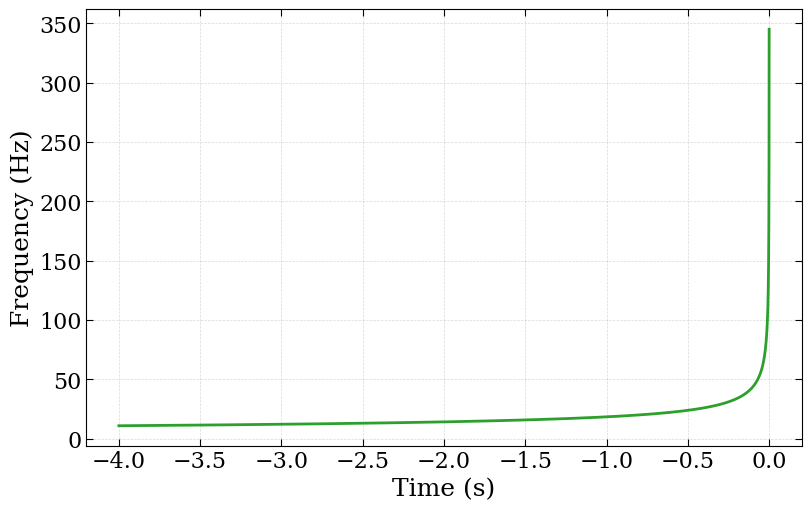

In [5]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t, f, color='tab:green', linewidth=2)

# labels
ax.set_xlabel('Time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('Frequency (Hz)', fontdict={'fontfamily':'serif', 'fontsize':18})
# ax.set_title('Frequency - time plot', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# display 
plt.show()

## Waveform plots

The strain of a compact binary system in TT gauge is

$$
[\bar{h}^{ij} (ct, \bm{r})] = \frac{4c}{D} \left( \frac{G M_{\odot}}{c^3} \right) ^{5/3} \frac{m_1 m_2}{(m_1 + m_2 )^{1/3}} \omega^{2/3} 
\begin{pmatrix}
\cos(2 \omega t + \phi) &   \sin(2 \omega t + \phi) & 0 \\
\sin(2 \omega t + \phi) & - \cos(2 \omega t + \phi) & 0 \\
0                       & 0                         & 0 \\
\end{pmatrix}
$$

where 
* $D$ is the distance between the observer and the system 
* $\phi$ is the orbit phase at coalescence
* $\omega = \frac{2 \pi f}{2} = \pi f$ is the orbital angular frequency (with $f$, emitted frequency)
* masses are expressed in units of solar masses.

It's useful to define

$ a = \frac{4c}{D} \left( \frac{G M_{\odot}}{c^3} \right) ^{5/3} \frac{m_1 m_2}{(m_1 + m_2 )^{1/3}} $ 

and

$ b = \omega^{2/3} = (\pi f)^{2/3} $


A GW signal with generic polarization results in a linear combination of signals with *plus* and *cross* polarization, respectively $h_+(t)$ and $h_{\times}(t)$:

$$
h(t) = h_+(t) + h_{\times}(t)
$$

where
 
$$
h_+(t) = a b \cos(2 \pi f t + \phi)
$$

$$
h_{\times}(t) = a b \sin(2 \pi f t + \phi)
$$

In [6]:
# phase at coalescence (radiants)
phi = 1   

a = 4*C/d * pow(G*M_S, 5/3) * pow(C, -5) * m1_sm * m2_sm * pow(m1_sm+m2_sm, -1/3)

b = pow(np.pi * f, 2/3)

# waveform with + (plus) polarization
h_p = a * b * np.cos(2 * np.pi * f * t + phi)

# waveform with x (cross) polarization
h_c = a * b * np.sin(2 * np.pi * f * t + phi)

### + polarization waveform plot

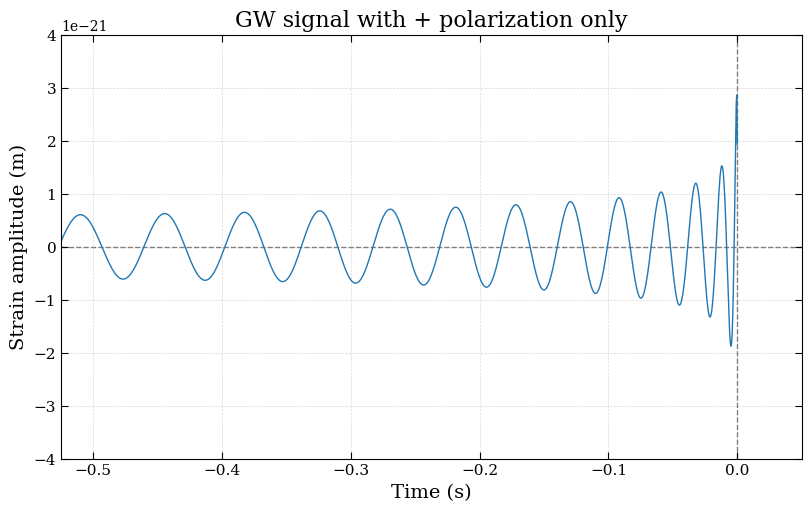

In [7]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True)

# plot
ax.plot(t, h_p, color='tab:blue', linewidth=1, zorder=1)

# reference lines
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)

# labels 
ax.set_xlabel('Time (s)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_ylabel('Strain amplitude (m)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_title('GW signal with + polarization only', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=11)

# axis limits
ax.set_xlim(-0.525, 0.05)
ax.set_ylim(-4*10**(-21),4*10**(-21))

# display 
plt.show()

### + and x polarizations waveforms plot

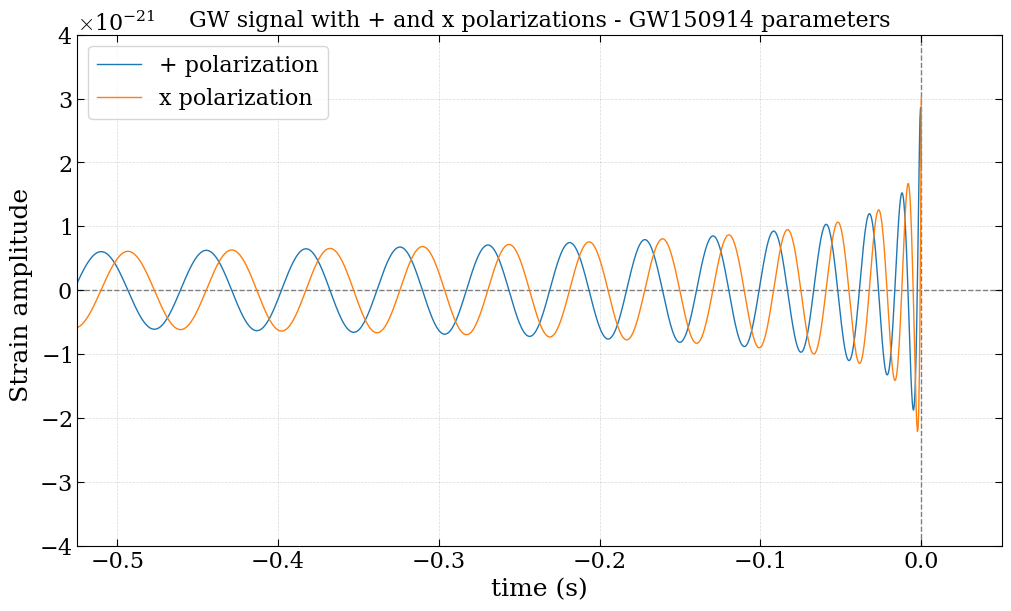

In [8]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t, h_p, color='tab:blue',   linewidth=1, zorder=1, label='+ polarization')
ax.plot(t, h_c, color='tab:orange', linewidth=1, zorder=1, label='x polarization')

# reference lines
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)

# labels 
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('Strain amplitude ', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_title('GW signal with + and x polarizations - GW150914 parameters', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# axis limits
ax.set_xlim(-0.525, 0.05)
ax.set_ylim(-4*10**(-21),4*10**(-21))

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(16)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# legend
ax.legend(prop={'size' : 16})

# display 
plt.show()

## PyCBC

Now we retrieve the waveform for GW150914 with numerical relativity and compare it with newtonian chirp. To run the code, it is necessary to install `pycbc` (basically see [igwn](https://computing.docs.ligo.org/conda/environments/igwn-py39/)).

In [9]:
from pycbc.waveform import get_td_waveform

In [10]:
# chirp parameter
m1 = 35.6     # solar masses
m2 = 30.6
d = 440     # Mpc

dt = 10**(-4)

# waveform (plus and cross polarization)
hp, hc = get_td_waveform(approximant='EOBNRv2', 
                                        mass1=m1, 
                                        mass2=m2, 
                                        distance=d, 
                                        f_lower=14, 
                                        delta_t=dt)

# time
t1 = np.linspace( -4, 0.32, len(hp))

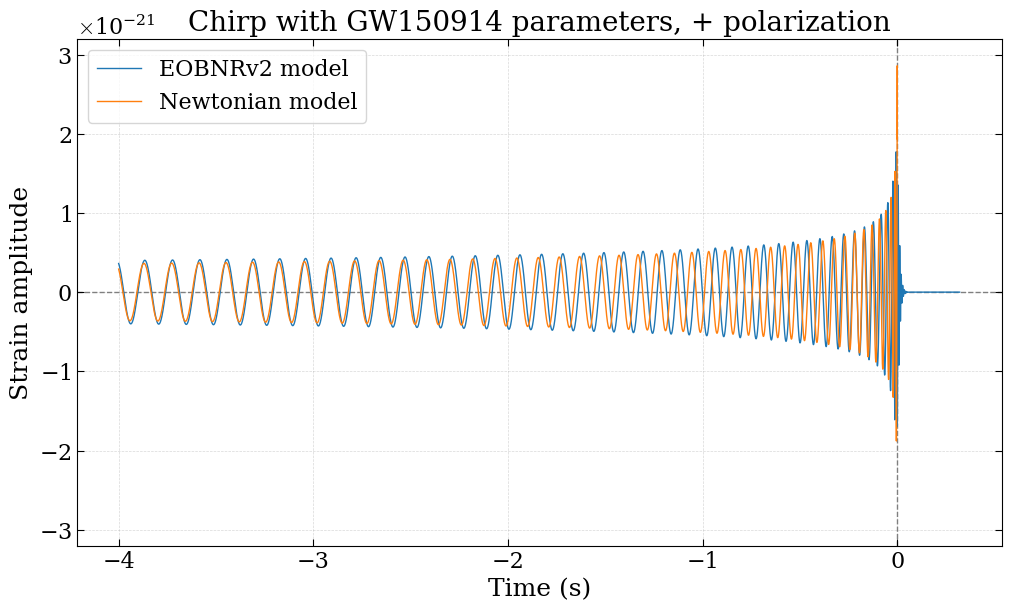

In [11]:
# plot

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True)

# plot
ax.plot(t1, hp, color='tab:blue', linewidth=1, zorder=1, label='EOBNRv2 model')
ax.plot(t, h_p, color='tab:orange', linewidth=1, zorder=1, label='Newtonian model')


# reference lines
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)

# labels 
ax.set_xlabel('Time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('Strain amplitude', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_title('Chirp with GW150914 parameters, + polarization', fontdict={'fontfamily':'serif', 'fontsize':20})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(16)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# legend
ax.legend(prop={'size' : 16})

# ax.set_xlim(-0.5, 0.1)
ax.set_ylim(-3.2*10**(-21), 3.2*10**(-21))


# display 
plt.show()